<a href="https://colab.research.google.com/github/punchnami/RBC-AI-Powered-Research-Query-Chatbot/blob/main/PredictiveModel_LSTM_20240701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the path to the Excel file
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/1/Search.xlsx'


# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Effective Date            4680 non-null   object 
 1   Rate Type                 4680 non-null   object 
 2   Rate (%)                  4680 non-null   float64
 3   1st Percentile (%)        4674 non-null   float64
 4   25th Percentile (%)       4674 non-null   float64
 5   75th Percentile (%)       4674 non-null   float64
 6   99th Percentile (%)       4674 non-null   float64
 7   Volume ($Billions)        4680 non-null   int64  
 8   Target Rate From (%)      0 non-null      float64
 9   Target Rate To (%)        0 non-null      float64
 10  Intra Day - Low (%)       0 non-null      float64
 11  Intra Day - High (%)      0 non-null      float64
 12  Standard Deviation (%)    0 non-null      float64
 13  30-Day Average SOFR       0 non-null      float64
 14  90-Day A

In [ ]:
import pandas as pd

# Drop columns where all values are null
df_cleaned = df.dropna(axis=1, how='all')

# Drop the 'Footnote ID' column
df_cleaned = df_cleaned.drop(columns=['Footnote ID'])

# Keep only rows where 'Rate Type' is 'BGCR'
df_cleaned = df_cleaned[df_cleaned['Rate Type'] == 'BGCR']

df_BGCR = df_cleaned.copy()
df_BGCR

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions)
1,06/27/2024,BGCR,5.32,5.25,5.32,5.33,5.39,732
4,06/26/2024,BGCR,5.33,5.26,5.33,5.34,5.44,740
7,06/25/2024,BGCR,5.32,5.27,5.32,5.33,5.42,751
10,06/24/2024,BGCR,5.30,5.25,5.30,5.31,5.37,755
13,06/21/2024,BGCR,5.30,5.25,5.30,5.31,5.37,760
...,...,...,...,...,...,...,...,...
4666,04/06/2018,BGCR,1.70,1.60,1.70,1.70,1.83,352
4669,04/05/2018,BGCR,1.70,1.60,1.70,1.70,1.85,349
4672,04/04/2018,BGCR,1.70,1.57,1.70,1.70,1.81,348
4675,04/03/2018,BGCR,1.81,1.50,1.80,1.82,1.97,344


In [ ]:
df_BGCR = df_BGCR.rename(columns={'Effective Date': 'Date'})

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/2 3. Treasury Yield; Yield Spread; Federal/daily-treasury-rates_2018.csv'


# Load the csv file into a DataFrame
df = pd.read_csv(file_path)

df

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/31/2018,2.40,2.44,2.41,2.45,2.40,2.45,2.50,2.57,2.54,2.63
1,12/28/2018,2.35,2.39,2.43,2.47,2.35,2.40,2.42,2.48,2.51,2.59
2,12/27/2018,2.39,2.43,2.42,2.46,2.36,2.41,2.43,2.49,2.50,2.58
3,12/26/2018,2.37,2.41,2.38,2.42,2.39,2.44,2.47,2.54,2.53,2.61
4,12/24/2018,2.38,2.42,2.38,2.42,2.41,2.46,2.46,2.53,2.53,2.61
...,...,...,...,...,...,...,...,...,...,...,...
244,01/08/2018,1.26,1.28,NaN,NaN,1.43,1.46,1.57,1.60,1.74,1.79
245,01/05/2018,1.24,1.26,NaN,NaN,1.37,1.39,1.55,1.58,1.75,1.80
246,01/04/2018,1.25,1.27,NaN,NaN,1.39,1.41,1.57,1.60,1.77,1.82
247,01/03/2018,1.27,1.29,NaN,NaN,1.39,1.41,1.56,1.59,1.76,1.81


In [ ]:
import pandas as pd
import glob
import os
# Define the path to the directory containing the CSV files
path = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/2 3. Treasury Yield; Yield Spread; Federal'

# List of files to concatenate
files_to_concatenate = [
    'daily-treasury-rates_2018.csv',
    'daily-treasury-rates_2019.csv',
    'daily-treasury-rates_2020.csv',
    'daily-treasury-rates_2021.csv',
    'daily-treasury-rates_2022.csv',
    'daily-treasury-rates_2023.csv',
    'daily-treasury-rates_2024.csv'
]

# List to store individual DataFrames
df_list = []

# Loop through the files and read them into DataFrames
for file in files_to_concatenate:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# Drop columns where all values are null
merged_df = merged_df.dropna(axis=1, how='all')

# Drop the 'Footnote ID' column if it exists
if 'Footnote ID' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Footnote ID'])


# Display the DataFrame info after cleaning
print(merged_df.info())

merged_daily_treasury_rates = merged_df.copy()
merged_daily_treasury_rates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1624 non-null   object 
 1   4 WEEKS BANK DISCOUNT       1624 non-null   float64
 2   4 WEEKS COUPON EQUIVALENT   1624 non-null   float64
 3   8 WEEKS BANK DISCOUNT       1426 non-null   float64
 4   8 WEEKS COUPON EQUIVALENT   1426 non-null   float64
 5   13 WEEKS BANK DISCOUNT      1624 non-null   float64
 6   13 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 7   26 WEEKS BANK DISCOUNT      1624 non-null   float64
 8   26 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 9   52 WEEKS BANK DISCOUNT      1624 non-null   float64
 10  52 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 11  17 WEEKS BANK DISCOUNT      424 non-null    float64
 12  17 WEEKS COUPON EQUIVALENT  424 non-null    float64
dtypes: float64(12), object(1)
memory 

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT
0,12/31/2018,2.40,2.44,2.41,2.45,2.40,2.45,2.50,2.57,2.54,2.63,NaN,NaN
1,12/28/2018,2.35,2.39,2.43,2.47,2.35,2.40,2.42,2.48,2.51,2.59,NaN,NaN
2,12/27/2018,2.39,2.43,2.42,2.46,2.36,2.41,2.43,2.49,2.50,2.58,NaN,NaN
3,12/26/2018,2.37,2.41,2.38,2.42,2.39,2.44,2.47,2.54,2.53,2.61,NaN,NaN
4,12/24/2018,2.38,2.42,2.38,2.42,2.41,2.46,2.46,2.53,2.53,2.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,01/08/2024,5.28,5.39,5.28,5.41,5.25,5.41,5.04,5.26,4.59,4.83,5.19,5.37
1620,01/05/2024,5.28,5.39,5.27,5.40,5.24,5.40,5.05,5.27,4.61,4.85,5.20,5.38
1621,01/04/2024,5.29,5.40,5.28,5.41,5.24,5.40,5.06,5.28,4.61,4.85,5.21,5.39
1622,01/03/2024,5.27,5.38,5.28,5.41,5.24,5.40,5.06,5.28,4.58,4.82,5.21,5.39


In [ ]:
# Define the path to the directory containing the CSV files
path = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/2 3. Treasury Yield; Yield Spread; Federal'

# List of files to concatenate
files_to_concatenate = [
    'daily-treasury-rates_LT_2018.csv',
    'daily-treasury-rates_LT_2019.csv',
    'daily-treasury-rates_LT_2020.csv',
    'daily-treasury-rates_LT_2021.csv',
    'daily-treasury-rates_LT_2022.csv',
    'daily-treasury-rates_LT_2023.csv',
    'daily-treasury-rates_LT_2024.csv'
]

# List to store individual DataFrames
df_list = []

# Loop through the files and read them into DataFrames
for file in files_to_concatenate:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# Drop columns where all values are null
merged_df = merged_df.dropna(axis=1, how='all')

# Drop the 'Footnote ID' column if it exists
if 'Footnote ID' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Footnote ID'])


# Display the DataFrame info after cleaning
print(merged_df.info())

merged_daily_treasury_LT_rates = merged_df.copy()
merged_daily_treasury_LT_rates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1624 non-null   object 
 1   LT COMPOSITE (>10 Yrs)  1624 non-null   float64
 2   TREASURY 20-Yr CMT      1624 non-null   float64
dtypes: float64(2), object(1)
memory usage: 38.2+ KB
None


,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/31/2018,2.95,2.87
1,12/28/2018,2.97,2.89
2,12/27/2018,2.99,2.92
3,12/26/2018,3.01,2.94
4,12/24/2018,2.94,2.88
...,...,...,...
1619,01/08/2024,4.28,4.33
1620,01/05/2024,4.32,4.37
1621,01/04/2024,4.25,4.30
1622,01/03/2024,4.16,4.21


In [ ]:
# Merge DataFrames on 'Date'
df_merged = pd.merge(merged_daily_treasury_rates, merged_daily_treasury_LT_rates, on='Date', how='inner')

# Display the merged DataFrame info
print(df_merged.info())

df_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1624 non-null   object 
 1   4 WEEKS BANK DISCOUNT       1624 non-null   float64
 2   4 WEEKS COUPON EQUIVALENT   1624 non-null   float64
 3   8 WEEKS BANK DISCOUNT       1426 non-null   float64
 4   8 WEEKS COUPON EQUIVALENT   1426 non-null   float64
 5   13 WEEKS BANK DISCOUNT      1624 non-null   float64
 6   13 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 7   26 WEEKS BANK DISCOUNT      1624 non-null   float64
 8   26 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 9   52 WEEKS BANK DISCOUNT      1624 non-null   float64
 10  52 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 11  17 WEEKS BANK DISCOUNT      424 non-null    float64
 12  17 WEEKS COUPON EQUIVALENT  424 non-null    float64
 13  LT COMPOSITE (>10 Yrs)      1624 

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/31/2018,2.40,2.44,2.41,2.45,2.40,2.45,2.50,2.57,2.54,2.63,NaN,NaN,2.95,2.87
1,12/28/2018,2.35,2.39,2.43,2.47,2.35,2.40,2.42,2.48,2.51,2.59,NaN,NaN,2.97,2.89
2,12/27/2018,2.39,2.43,2.42,2.46,2.36,2.41,2.43,2.49,2.50,2.58,NaN,NaN,2.99,2.92
3,12/26/2018,2.37,2.41,2.38,2.42,2.39,2.44,2.47,2.54,2.53,2.61,NaN,NaN,3.01,2.94
4,12/24/2018,2.38,2.42,2.38,2.42,2.41,2.46,2.46,2.53,2.53,2.61,NaN,NaN,2.94,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,01/08/2024,5.28,5.39,5.28,5.41,5.25,5.41,5.04,5.26,4.59,4.83,5.19,5.37,4.28,4.33
1620,01/05/2024,5.28,5.39,5.27,5.40,5.24,5.40,5.05,5.27,4.61,4.85,5.20,5.38,4.32,4.37
1621,01/04/2024,5.29,5.40,5.28,5.41,5.24,5.40,5.06,5.28,4.61,4.85,5.21,5.39,4.25,4.30
1622,01/03/2024,5.27,5.38,5.28,5.41,5.24,5.40,5.06,5.28,4.58,4.82,5.21,5.39,4.16,4.21


In [ ]:
# Calculate short-term yield spreads
df_merged['Yield Spread (4W - 52W)'] = df_merged['52 WEEKS COUPON EQUIVALENT'] - df_merged['4 WEEKS COUPON EQUIVALENT']
df_merged['Yield Spread (13W - 52W)'] = df_merged['52 WEEKS COUPON EQUIVALENT'] - df_merged['13 WEEKS COUPON EQUIVALENT']
df_merged['Yield Spread (26W - 52W)'] = df_merged['52 WEEKS COUPON EQUIVALENT'] - df_merged['26 WEEKS COUPON EQUIVALENT']

# Calculate long-term yield spreads
df_merged['Yield Spread (10Y - 4W)'] = df_merged['LT COMPOSITE (>10 Yrs)'] - df_merged['4 WEEKS COUPON EQUIVALENT']
df_merged['Yield Spread (20Y - 4W)'] = df_merged['TREASURY 20-Yr CMT'] - df_merged['4 WEEKS COUPON EQUIVALENT']
df_merged['Yield Spread (10Y - 52W)'] = df_merged['LT COMPOSITE (>10 Yrs)'] - df_merged['52 WEEKS COUPON EQUIVALENT']
df_merged['Yield Spread (20Y - 52W)'] = df_merged['TREASURY 20-Yr CMT'] - df_merged['52 WEEKS COUPON EQUIVALENT']

# Display the DataFrame info with new columns
print(df_merged.info())

df_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1624 non-null   object 
 1   4 WEEKS BANK DISCOUNT       1624 non-null   float64
 2   4 WEEKS COUPON EQUIVALENT   1624 non-null   float64
 3   8 WEEKS BANK DISCOUNT       1426 non-null   float64
 4   8 WEEKS COUPON EQUIVALENT   1426 non-null   float64
 5   13 WEEKS BANK DISCOUNT      1624 non-null   float64
 6   13 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 7   26 WEEKS BANK DISCOUNT      1624 non-null   float64
 8   26 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 9   52 WEEKS BANK DISCOUNT      1624 non-null   float64
 10  52 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 11  17 WEEKS BANK DISCOUNT      424 non-null    float64
 12  17 WEEKS COUPON EQUIVALENT  424 non-null    float64
 13  LT COMPOSITE (>10 Yrs)      1624 

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,...,17 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT,Yield Spread (4W - 52W),Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W)
0,12/31/2018,2.40,2.44,2.41,2.45,2.40,2.45,2.50,2.57,2.54,...,NaN,2.95,2.87,0.19,0.18,0.06,0.51,0.43,0.32,0.24
1,12/28/2018,2.35,2.39,2.43,2.47,2.35,2.40,2.42,2.48,2.51,...,NaN,2.97,2.89,0.20,0.19,0.11,0.58,0.50,0.38,0.30
2,12/27/2018,2.39,2.43,2.42,2.46,2.36,2.41,2.43,2.49,2.50,...,NaN,2.99,2.92,0.15,0.17,0.09,0.56,0.49,0.41,0.34
3,12/26/2018,2.37,2.41,2.38,2.42,2.39,2.44,2.47,2.54,2.53,...,NaN,3.01,2.94,0.20,0.17,0.07,0.60,0.53,0.40,0.33
4,12/24/2018,2.38,2.42,2.38,2.42,2.41,2.46,2.46,2.53,2.53,...,NaN,2.94,2.88,0.19,0.15,0.08,0.52,0.46,0.33,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,01/08/2024,5.28,5.39,5.28,5.41,5.25,5.41,5.04,5.26,4.59,...,5.37,4.28,4.33,-0.56,-0.58,-0.43,-1.11,-1.06,-0.55,-0.50
1620,01/05/2024,5.28,5.39,5.27,5.40,5.24,5.40,5.05,5.27,4.61,...,5.38,4.32,4.37,-0.54,-0.55,-0.42,-1.07,-1.02,-0.53,-0.48
1621,01/04/2024,5.29,5.40,5.28,5.41,5.24,5.40,5.06,5.28,4.61,...,5.39,4.25,4.30,-0.55,-0.55,-0.43,-1.15,-1.10,-0.60,-0.55
1622,01/03/2024,5.27,5.38,5.28,5.41,5.24,5.40,5.06,5.28,4.58,...,5.39,4.16,4.21,-0.56,-0.58,-0.46,-1.22,-1.17,-0.66,-0.61


In [ ]:
# List of columns to keep
columns_to_keep = [
    'Date',
    '4 WEEKS COUPON EQUIVALENT',
    '13 WEEKS COUPON EQUIVALENT',
    '26 WEEKS COUPON EQUIVALENT',
    '52 WEEKS COUPON EQUIVALENT',
    'LT COMPOSITE (>10 Yrs)',
    'TREASURY 20-Yr CMT',
    'Yield Spread (4W - 52W)',
    'Yield Spread (13W - 52W)',
    'Yield Spread (26W - 52W)',
    'Yield Spread (10Y - 4W)',
    'Yield Spread (20Y - 4W)',
    'Yield Spread (10Y - 52W)',
    'Yield Spread (20Y - 52W)'
]

# Create a new DataFrame with only the relevant columns
df_relevant = df_merged[columns_to_keep]

# Display the DataFrame info to verify
print(df_relevant.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1624 non-null   object 
 1   4 WEEKS COUPON EQUIVALENT   1624 non-null   float64
 2   13 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 3   26 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 4   52 WEEKS COUPON EQUIVALENT  1624 non-null   float64
 5   LT COMPOSITE (>10 Yrs)      1624 non-null   float64
 6   TREASURY 20-Yr CMT          1624 non-null   float64
 7   Yield Spread (4W - 52W)     1624 non-null   float64
 8   Yield Spread (13W - 52W)    1624 non-null   float64
 9   Yield Spread (26W - 52W)    1624 non-null   float64
 10  Yield Spread (10Y - 4W)     1624 non-null   float64
 11  Yield Spread (20Y - 4W)     1624 non-null   float64
 12  Yield Spread (10Y - 52W)    1624 non-null   float64
 13  Yield Spread (20Y - 52W)    1624 

Combine #1 and #2 and #3: Repo Rates, Treasury Rates, Yield Spread

In [ ]:
# Merge DataFrames on 'Date'
df_merged = pd.merge(df_BGCR, df_relevant, on='Date', how='inner')

# Display the merged DataFrame info
print(df_merged.info())

df_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1560 non-null   object 
 1   Rate Type                   1560 non-null   object 
 2   Rate (%)                    1560 non-null   float64
 3   1st Percentile (%)          1558 non-null   float64
 4   25th Percentile (%)         1558 non-null   float64
 5   75th Percentile (%)         1558 non-null   float64
 6   99th Percentile (%)         1558 non-null   float64
 7   Volume ($Billions)          1560 non-null   int64  
 8   4 WEEKS COUPON EQUIVALENT   1560 non-null   float64
 9   13 WEEKS COUPON EQUIVALENT  1560 non-null   float64
 10  26 WEEKS COUPON EQUIVALENT  1560 non-null   float64
 11  52 WEEKS COUPON EQUIVALENT  1560 non-null   float64
 12  LT COMPOSITE (>10 Yrs)      1560 non-null   float64
 13  TREASURY 20-Yr CMT          1560 

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,52 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT,Yield Spread (4W - 52W),Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W)
0,06/27/2024,BGCR,5.32,5.25,5.32,5.33,5.39,732,5.37,5.37,...,5.12,4.50,4.53,-0.25,-0.25,-0.21,-0.87,-0.84,-0.62,-0.59
1,06/26/2024,BGCR,5.33,5.26,5.33,5.34,5.44,740,5.33,5.38,...,5.14,4.52,4.55,-0.19,-0.24,-0.21,-0.81,-0.78,-0.62,-0.59
2,06/25/2024,BGCR,5.32,5.27,5.32,5.33,5.42,751,5.32,5.37,...,5.11,4.43,4.46,-0.21,-0.26,-0.24,-0.89,-0.86,-0.68,-0.65
3,06/24/2024,BGCR,5.30,5.25,5.30,5.31,5.37,755,5.31,5.38,...,5.11,4.45,4.48,-0.20,-0.27,-0.24,-0.86,-0.83,-0.66,-0.63
4,06/21/2024,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,5.11,4.46,4.49,-0.20,-0.26,-0.24,-0.85,-0.82,-0.65,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,04/06/2018,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,2.06,2.94,2.89,0.39,0.33,0.16,1.27,1.22,0.88,0.83
1556,04/05/2018,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,2.07,3.01,2.95,0.41,0.35,0.15,1.35,1.29,0.94,0.88
1557,04/04/2018,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,2.07,2.97,2.91,0.39,0.36,0.17,1.29,1.23,0.90,0.84
1558,04/03/2018,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,2.09,2.96,2.90,0.39,0.34,0.17,1.26,1.20,0.87,0.81


In [ ]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

In [ ]:
# Load the CPI data
cpi_data = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Jan': [247.867, 251.712, 257.971, 261.582, 281.148, 299.170, 308.417],
    'Feb': [248.991, 252.776, 258.678, 263.014, 283.716, 300.840, 310.326],
    'Mar': [249.554, 254.202, 258.115, 264.877, 287.504, 301.836, 312.332],
    'Apr': [250.546, 255.548, 256.389, 267.054, 289.109, 303.363, 313.548],
    'May': [251.588, 256.092, 256.934, 269.195, 292.296, 304.127, 314.069],
    'Jun': [251.988, 256.143, 257.797, 271.696, 296.311, 305.109, 314.069],
    'Jul': [252.006, 256.571, 259.101, 273.003, 296.276, 305.691, None],
    'Aug': [252.146, 256.558, 259.918, 273.567, 296.171, 307.026, None],
    'Sep': [252.439, 256.759, 260.280, 274.310, 296.908, 307.789, None],
    'Oct': [252.885, 257.346, 260.388, 276.589, 298.012, 307.671, None],
    'Nov': [252.038, 257.346, 260.229, 277.948, 297.711, 307.051, None],
    'Dec': [251.233, 257.208, 260.474, 278.802, 296.797, 306.746, None]
}

# Converting CPI data to DataFrame
cpi_df = pd.DataFrame(cpi_data)

# Melting the CPI DataFrame to long format
cpi_long_df = pd.melt(cpi_df, id_vars=['Year'], var_name='Month', value_name='CPI')

# Mapping month names to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
cpi_long_df['Month'] = cpi_long_df['Month'].map(month_mapping)

# Creating a 'Day' column with value 1 for each row
cpi_long_df['Day'] = 1

# Creating a date column in the CPI DataFrame
cpi_long_df['Date'] = pd.to_datetime(cpi_long_df[['Year', 'Month', 'Day']])

# Dropping unnecessary columns
cpi_long_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Setting the Date as the index
cpi_long_df.set_index('Date', inplace=True)

# Reindexing to fill in missing dates with forward fill for the last known CPI value of each month
cpi_long_df = cpi_long_df.resample('D').ffill()

# Reset the index to have Date as a column again
cpi_long_df.reset_index(inplace=True)


In [ ]:
cpi_long_df['Date'] = pd.to_datetime(cpi_long_df['Date'])

# Merging the dataframes
df_merged2 = pd.merge(df_merged, cpi_long_df[['Date', 'CPI']], on='Date', how='left')
df_merged2


,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT,Yield Spread (4W - 52W),Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W),CPI
0,2024-06-27,BGCR,5.32,5.25,5.32,5.33,5.39,732,5.37,5.37,...,4.50,4.53,-0.25,-0.25,-0.21,-0.87,-0.84,-0.62,-0.59,314.069
1,2024-06-26,BGCR,5.33,5.26,5.33,5.34,5.44,740,5.33,5.38,...,4.52,4.55,-0.19,-0.24,-0.21,-0.81,-0.78,-0.62,-0.59,314.069
2,2024-06-25,BGCR,5.32,5.27,5.32,5.33,5.42,751,5.32,5.37,...,4.43,4.46,-0.21,-0.26,-0.24,-0.89,-0.86,-0.68,-0.65,314.069
3,2024-06-24,BGCR,5.30,5.25,5.30,5.31,5.37,755,5.31,5.38,...,4.45,4.48,-0.20,-0.27,-0.24,-0.86,-0.83,-0.66,-0.63,314.069
4,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,4.46,4.49,-0.20,-0.26,-0.24,-0.85,-0.82,-0.65,-0.62,314.069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,2.94,2.89,0.39,0.33,0.16,1.27,1.22,0.88,0.83,250.546
1556,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,3.01,2.95,0.41,0.35,0.15,1.35,1.29,0.94,0.88,250.546
1557,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,2.97,2.91,0.39,0.36,0.17,1.29,1.23,0.90,0.84,250.546
1558,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,2.96,2.90,0.39,0.34,0.17,1.26,1.20,0.87,0.81,250.546


Now begin adding stock market data

In [ ]:
# Define the path to the directory containing the CSV files
path6 = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/6. Stock Market Data/HistoricalData_1719610851813_SPX.csv'
# Load the csv file into a DataFrame
df = pd.read_csv(path6)
df

,Date,Close/Last,Open,High,Low
0,06/27/2024,5482.87,5473.59,5490.81,5467.54
1,06/26/2024,5477.90,5460.71,5483.14,5451.87
2,06/25/2024,5469.30,5460.73,5472.88,5446.56
3,06/24/2024,5447.87,5459.58,5490.66,5447.59
4,06/21/2024,5464.62,5466.77,5478.31,5452.03
...,...,...,...,...,...
2524,07/04/2014,1985.44,0.00,0.00,0.00
2525,07/03/2014,1985.44,1975.88,1985.59,1975.88
2526,07/02/2014,1974.62,1973.06,1976.67,1972.58
2527,07/01/2014,1973.32,1962.29,1978.58,1962.29


In [ ]:
df = df.drop(columns=['Open', 'High', 'Low'])
df = df.rename(columns={'Close/Last': 'SPX'})
df

,Date,SPX
0,06/27/2024,5482.87
1,06/26/2024,5477.90
2,06/25/2024,5469.30
3,06/24/2024,5447.87
4,06/21/2024,5464.62
...,...,...
2524,07/04/2014,1985.44
2525,07/03/2014,1985.44
2526,07/02/2014,1974.62
2527,07/01/2014,1973.32


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Merge DataFrames on 'Date'
df_merged3 = pd.merge(df_merged2, df, on='Date', how='inner')
df_merged3

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,TREASURY 20-Yr CMT,Yield Spread (4W - 52W),Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W),CPI,SPX
0,2024-06-27,BGCR,5.32,5.25,5.32,5.33,5.39,732,5.37,5.37,...,4.53,-0.25,-0.25,-0.21,-0.87,-0.84,-0.62,-0.59,314.069,5482.87
1,2024-06-26,BGCR,5.33,5.26,5.33,5.34,5.44,740,5.33,5.38,...,4.55,-0.19,-0.24,-0.21,-0.81,-0.78,-0.62,-0.59,314.069,5477.90
2,2024-06-25,BGCR,5.32,5.27,5.32,5.33,5.42,751,5.32,5.37,...,4.46,-0.21,-0.26,-0.24,-0.89,-0.86,-0.68,-0.65,314.069,5469.30
3,2024-06-24,BGCR,5.30,5.25,5.30,5.31,5.37,755,5.31,5.38,...,4.48,-0.20,-0.27,-0.24,-0.86,-0.83,-0.66,-0.63,314.069,5447.87
4,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,4.49,-0.20,-0.26,-0.24,-0.85,-0.82,-0.65,-0.62,314.069,5464.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,2.89,0.39,0.33,0.16,1.27,1.22,0.88,0.83,250.546,2604.47
1556,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,2.95,0.41,0.35,0.15,1.35,1.29,0.94,0.88,250.546,2662.84
1557,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,2.91,0.39,0.36,0.17,1.29,1.23,0.90,0.84,250.546,2644.69
1558,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,2.90,0.39,0.34,0.17,1.26,1.20,0.87,0.81,250.546,2614.45


In [ ]:
# Define the path to the directory containing the CSV files
path6 = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/6. Stock Market Data/HistoricalData_1719611009685_COMP.csv'
# Load the csv file into a DataFrame
df = pd.read_csv(path6)
df

,Date,Close/Last,Open,High,Low
0,06/27/2024,17858.68,17793.95,17892.78,17765.42
1,06/26/2024,17805.16,17697.26,17813.55,17687.07
2,06/25/2024,17717.65,17572.16,17734.34,17546.63
3,06/24/2024,17496.82,17640.26,17730.12,17494.02
4,06/21/2024,17689.36,17681.01,17787.34,17620.57
...,...,...,...,...,...
2524,07/04/2014,4485.93,0.00,0.00,0.00
2525,07/03/2014,4485.93,4472.89,4485.93,4463.85
2526,07/02/2014,4457.73,4457.86,4466.92,4450.87
2527,07/01/2014,4458.65,4424.71,4471.59,4424.43


In [ ]:
df = df.drop(columns=['Open', 'High', 'Low'])
df = df.rename(columns={'Close/Last': 'SPX'})
df

,Date,SPX
0,06/27/2024,17858.68
1,06/26/2024,17805.16
2,06/25/2024,17717.65
3,06/24/2024,17496.82
4,06/21/2024,17689.36
...,...,...
2524,07/04/2014,4485.93
2525,07/03/2014,4485.93
2526,07/02/2014,4457.73
2527,07/01/2014,4458.65


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Merge DataFrames on 'Date'
df_merged3 = pd.merge(df_merged3, df, on='Date', how='inner')
df_merged3

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,Yield Spread (4W - 52W),Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y
0,2024-06-27,BGCR,5.32,5.25,5.32,5.33,5.39,732,5.37,5.37,...,-0.25,-0.25,-0.21,-0.87,-0.84,-0.62,-0.59,314.069,5482.87,17858.68
1,2024-06-26,BGCR,5.33,5.26,5.33,5.34,5.44,740,5.33,5.38,...,-0.19,-0.24,-0.21,-0.81,-0.78,-0.62,-0.59,314.069,5477.90,17805.16
2,2024-06-25,BGCR,5.32,5.27,5.32,5.33,5.42,751,5.32,5.37,...,-0.21,-0.26,-0.24,-0.89,-0.86,-0.68,-0.65,314.069,5469.30,17717.65
3,2024-06-24,BGCR,5.30,5.25,5.30,5.31,5.37,755,5.31,5.38,...,-0.20,-0.27,-0.24,-0.86,-0.83,-0.66,-0.63,314.069,5447.87,17496.82
4,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,-0.20,-0.26,-0.24,-0.85,-0.82,-0.65,-0.62,314.069,5464.62,17689.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,0.39,0.33,0.16,1.27,1.22,0.88,0.83,250.546,2604.47,6915.11
1556,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,0.41,0.35,0.15,1.35,1.29,0.94,0.88,250.546,2662.84,7076.55
1557,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,0.39,0.36,0.17,1.29,1.23,0.90,0.84,250.546,2644.69,7042.11
1558,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,0.39,0.34,0.17,1.26,1.20,0.87,0.81,250.546,2614.45,6941.28


In [ ]:
import pandas as pd
# Define the path to the directory containing the CSV files
path6 = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/6. Stock Market Data/HistoricalPrices_DJIA.csv'
# Load the csv file into a DataFrame
df = pd.read_csv(path6)
df

,Date,Open,High,Low,Close
0,06/28/24,39092.39,39443.60,38937.15,39118.86
1,06/27/24,39107.10,39250.69,39026.75,39164.06
2,06/26/24,39063.15,39183.74,38908.99,39127.80
3,06/25/24,39398.79,39423.26,38997.23,39112.16
4,06/24/24,39184.49,39571.23,39184.49,39411.21
...,...,...,...,...,...
1567,04/06/18,24373.60,24434.40,23738.20,23932.76
1568,04/05/18,24313.91,24622.26,24313.91,24505.22
1569,04/04/18,23654.15,24308.96,23523.16,24264.30
1570,04/03/18,23698.33,24044.35,23664.33,24033.36


In [ ]:
print(df.columns)

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


In [ ]:
df = df.drop(columns=[' Open', ' High', ' Low'], axis=1)
df = df.rename(columns={' Close': 'DJIA'})
df['Date'] = pd.to_datetime(df['Date'])
df

<ipython-input-25-b4620c2d49b3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,DJIA
0,2024-06-28,39118.86
1,2024-06-27,39164.06
2,2024-06-26,39127.80
3,2024-06-25,39112.16
4,2024-06-24,39411.21
...,...,...
1567,2018-04-06,23932.76
1568,2018-04-05,24505.22
1569,2018-04-04,24264.30
1570,2018-04-03,24033.36


In [ ]:
# Merge DataFrames on 'Date'
df_merged3 = pd.merge(df_merged3, df, on='Date', how='inner')
df_merged3

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,Yield Spread (13W - 52W),Yield Spread (26W - 52W),Yield Spread (10Y - 4W),Yield Spread (20Y - 4W),Yield Spread (10Y - 52W),Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y,DJIA
0,2024-06-27,BGCR,5.32,5.25,5.32,5.33,5.39,732,5.37,5.37,...,-0.25,-0.21,-0.87,-0.84,-0.62,-0.59,314.069,5482.87,17858.68,39164.06
1,2024-06-26,BGCR,5.33,5.26,5.33,5.34,5.44,740,5.33,5.38,...,-0.24,-0.21,-0.81,-0.78,-0.62,-0.59,314.069,5477.90,17805.16,39127.80
2,2024-06-25,BGCR,5.32,5.27,5.32,5.33,5.42,751,5.32,5.37,...,-0.26,-0.24,-0.89,-0.86,-0.68,-0.65,314.069,5469.30,17717.65,39112.16
3,2024-06-24,BGCR,5.30,5.25,5.30,5.31,5.37,755,5.31,5.38,...,-0.27,-0.24,-0.86,-0.83,-0.66,-0.63,314.069,5447.87,17496.82,39411.21
4,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,-0.26,-0.24,-0.85,-0.82,-0.65,-0.62,314.069,5464.62,17689.36,39150.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,0.33,0.16,1.27,1.22,0.88,0.83,250.546,2604.47,6915.11,23932.76
1556,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,0.35,0.15,1.35,1.29,0.94,0.88,250.546,2662.84,7076.55,24505.22
1557,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,0.36,0.17,1.29,1.23,0.90,0.84,250.546,2644.69,7042.11,24264.30
1558,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,0.34,0.17,1.26,1.20,0.87,0.81,250.546,2614.45,6941.28,24033.36


Now add foreign exchange rate as new features

In [ ]:
# Define the path to the directory containing the CSV files
path7 = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/7. FX/FRB_H10.csv'
# Load the csv file into a DataFrame
df = pd.read_csv(path7)
df.head(10)

,Series Description,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$"
0,Unit:,Currency:_Per_EUR,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD
1,Multiplier:,1,1,1,1
2,Currency:,USD,USD,CNY,JPY
3,Unique Identifier:,H10/H10/RXI$US_N.B.EU,H10/H10/RXI$US_N.B.UK,H10/H10/RXI_N.B.CH,H10/H10/RXI_N.B.JA
4,Time Period,RXI$US_N.B.EU,RXI$US_N.B.UK,RXI_N.B.CH,RXI_N.B.JA
5,2000-01-03,1.0155,1.6270,8.2798,101.7000
6,2000-01-04,1.0309,1.6370,8.2799,103.0900
7,2000-01-05,1.0335,1.6415,8.2798,103.7700
8,2000-01-06,1.0324,1.6475,8.2797,105.1900
9,2000-01-07,1.0294,1.6384,8.2794,105.1700


In [ ]:
# Remove the first 5 rows
df = df.iloc[5:]

In [ ]:
print(df.columns)

Index(['Series Description', 'SPOT EXCHANGE RATE - EURO AREA ',
       'UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)',
       'CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R. ',
       'JAPAN -- SPOT EXCHANGE RATE, YEN/US$ '],
      dtype='object')


In [ ]:
df.rename(columns={'Series Description': 'Date'}, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$"
5,2000-01-03,1.0155,1.6270,8.2798,101.7000
6,2000-01-04,1.0309,1.6370,8.2799,103.0900
7,2000-01-05,1.0335,1.6415,8.2798,103.7700
8,2000-01-06,1.0324,1.6475,8.2797,105.1900
9,2000-01-07,1.0294,1.6384,8.2794,105.1700
...,...,...,...,...,...
6385,2024-06-17,1.0723,1.2689,7.2561,157.8000
6386,2024-06-18,1.0739,1.2699,7.2543,157.8100
6387,2024-06-19,ND,ND,ND,ND
6388,2024-06-20,1.0708,1.2671,7.2604,158.7700


In [ ]:
# Merge DataFrames on 'Date'
df_merged4 = pd.merge(df_merged3, df, on='Date', how='inner')
df_merged4

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,Yield Spread (10Y - 52W),Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y,DJIA,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$"
0,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,-0.65,-0.62,314.069,5464.62,17689.36,39150.33,1.0694,1.2645,7.2609,159.4500
1,2024-06-20,BGCR,5.31,5.25,5.31,5.31,5.36,767,5.31,5.38,...,-0.65,-0.62,314.069,5473.17,17721.59,39134.76,1.0708,1.2671,7.2604,158.7700
2,2024-06-18,BGCR,5.32,5.25,5.32,5.32,5.41,763,5.29,5.38,...,-0.66,-0.62,314.069,5487.03,17862.23,38834.86,1.0739,1.2699,7.2543,157.8100
3,2024-06-17,BGCR,5.32,5.26,5.31,5.32,5.42,772,5.34,5.39,...,-0.63,-0.59,314.069,5473.23,17857.02,38778.10,1.0723,1.2689,7.2561,157.8000
4,2024-06-14,BGCR,5.30,5.25,5.30,5.31,5.37,785,5.35,5.39,...,-0.64,-0.60,314.069,5431.60,17688.88,38589.16,1.0699,1.2685,7.2557,157.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,0.88,0.83,250.546,2604.47,6915.11,23932.76,1.2274,1.4088,6.3045,107.0300
1552,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,0.94,0.88,250.546,2662.84,7076.55,24505.22,1.2230,1.3991,6.3045,107.4800
1553,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,0.90,0.84,250.546,2644.69,7042.11,24264.30,1.2292,1.4076,6.3045,106.5600
1554,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,0.87,0.81,250.546,2614.45,6941.28,24033.36,1.2261,1.4068,6.2881,106.4500


Add Fed Rate

In [ ]:
# Define the path to the directory containing the CSV files
path3 = '/content/drive/MyDrive/Colab Notebooks/Predictive Model/Predictive Model/2 3. Treasury Yield; Yield Spread; Federal/federal fund rate.xlsx'
# Load the excel file into a DataFrame
df = pd.read_excel(path3)
df.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,06/27/2024,BGCR,5.32,5.25,5.32,5.33,5.39,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/27/2024,SOFR,5.34,5.29,5.32,5.41,5.48,1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2024,BGCR,5.33,5.26,5.33,5.34,5.44,740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2024,SOFR,5.34,5.30,5.33,5.45,5.50,1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/25/2024,BGCR,5.32,5.27,5.32,5.33,5.42,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/25/2024,SOFR,5.33,5.30,5.32,5.41,5.46,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06/24/2024,BGCR,5.30,5.25,5.30,5.31,5.37,755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06/24/2024,SOFR,5.31,5.28,5.30,5.36,5.40,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06/21/2024,BGCR,5.30,5.25,5.30,5.31,5.37,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06/21/2024,SOFR,5.31,5.28,5.30,5.35,5.41,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['Rate Type'] == 'BGCR']
df = pd.DataFrame(df, columns=['Effective Date', 'Rate (%)'])
df = df.rename(columns={'Effective Date': 'Date'})
df = df.rename(columns={'Rate (%)': 'Fed_Fund_Rate'})
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Fed_Fund_Rate
0,2024-06-27,5.32
2,2024-06-26,5.33
4,2024-06-25,5.32
6,2024-06-24,5.30
8,2024-06-21,5.30
...,...,...
3110,2018-04-06,1.70
3112,2018-04-05,1.70
3114,2018-04-04,1.70
3116,2018-04-03,1.81


In [ ]:
# Merge DataFrames on 'Date'
df_merged5 = pd.merge(df_merged4, df, on='Date', how='inner')
df_merged5

,Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,...,Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y,DJIA,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$",Fed_Fund_Rate
0,2024-06-21,BGCR,5.30,5.25,5.30,5.31,5.37,760,5.31,5.37,...,-0.62,314.069,5464.62,17689.36,39150.33,1.0694,1.2645,7.2609,159.4500,5.30
1,2024-06-20,BGCR,5.31,5.25,5.31,5.31,5.36,767,5.31,5.38,...,-0.62,314.069,5473.17,17721.59,39134.76,1.0708,1.2671,7.2604,158.7700,5.31
2,2024-06-18,BGCR,5.32,5.25,5.32,5.32,5.41,763,5.29,5.38,...,-0.62,314.069,5487.03,17862.23,38834.86,1.0739,1.2699,7.2543,157.8100,5.32
3,2024-06-17,BGCR,5.32,5.26,5.31,5.32,5.42,772,5.34,5.39,...,-0.59,314.069,5473.23,17857.02,38778.10,1.0723,1.2689,7.2561,157.8000,5.32
4,2024-06-14,BGCR,5.30,5.25,5.30,5.31,5.37,785,5.35,5.39,...,-0.60,314.069,5431.60,17688.88,38589.16,1.0699,1.2685,7.2557,157.2800,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2018-04-06,BGCR,1.70,1.60,1.70,1.70,1.83,352,1.67,1.73,...,0.83,250.546,2604.47,6915.11,23932.76,1.2274,1.4088,6.3045,107.0300,1.70
1552,2018-04-05,BGCR,1.70,1.60,1.70,1.70,1.85,349,1.66,1.72,...,0.88,250.546,2662.84,7076.55,24505.22,1.2230,1.3991,6.3045,107.4800,1.70
1553,2018-04-04,BGCR,1.70,1.57,1.70,1.70,1.81,348,1.68,1.71,...,0.84,250.546,2644.69,7042.11,24264.30,1.2292,1.4076,6.3045,106.5600,1.70
1554,2018-04-03,BGCR,1.81,1.50,1.80,1.82,1.97,344,1.70,1.75,...,0.81,250.546,2614.45,6941.28,24033.36,1.2261,1.4068,6.2881,106.4500,1.81


In [ ]:
pip install investpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481568 sha256=6600fa35acefd53b164b2737e1aeb45bd11910f7d6158983bdc7b6a9e359a16e
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


Preiction#1: LSTM

In [ ]:
#!pip install numpy pandas tensorflow scikit-learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_final = df_merged5.copy()
df_final = df_final.drop(columns=[ 'Rate Type','1st Percentile (%)', '25th Percentile (%)','75th Percentile (%)', '99th Percentile (%)'])
df_final

,Date,Rate (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,26 WEEKS COUPON EQUIVALENT,52 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT,Yield Spread (4W - 52W),...,Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y,DJIA,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$",Fed_Fund_Rate
0,2024-06-21,5.30,760,5.31,5.37,5.35,5.11,4.46,4.49,-0.20,...,-0.62,314.069,5464.62,17689.36,39150.33,1.0694,1.2645,7.2609,159.4500,5.30
1,2024-06-20,5.31,767,5.31,5.38,5.36,5.11,4.46,4.49,-0.20,...,-0.62,314.069,5473.17,17721.59,39134.76,1.0708,1.2671,7.2604,158.7700,5.31
2,2024-06-18,5.32,763,5.29,5.38,5.36,5.09,4.43,4.47,-0.20,...,-0.62,314.069,5487.03,17862.23,38834.86,1.0739,1.2699,7.2543,157.8100,5.32
3,2024-06-17,5.32,772,5.34,5.39,5.37,5.11,4.48,4.52,-0.23,...,-0.59,314.069,5473.23,17857.02,38778.10,1.0723,1.2689,7.2561,157.8000,5.32
4,2024-06-14,5.30,785,5.35,5.39,5.35,5.06,4.42,4.46,-0.29,...,-0.60,314.069,5431.60,17688.88,38589.16,1.0699,1.2685,7.2557,157.2800,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2018-04-06,1.70,352,1.67,1.73,1.90,2.06,2.94,2.89,0.39,...,0.83,250.546,2604.47,6915.11,23932.76,1.2274,1.4088,6.3045,107.0300,1.70
1552,2018-04-05,1.70,349,1.66,1.72,1.92,2.07,3.01,2.95,0.41,...,0.88,250.546,2662.84,7076.55,24505.22,1.2230,1.3991,6.3045,107.4800,1.70
1553,2018-04-04,1.70,348,1.68,1.71,1.90,2.07,2.97,2.91,0.39,...,0.84,250.546,2644.69,7042.11,24264.30,1.2292,1.4076,6.3045,106.5600,1.70
1554,2018-04-03,1.81,344,1.70,1.75,1.92,2.09,2.96,2.90,0.39,...,0.81,250.546,2614.45,6941.28,24033.36,1.2261,1.4068,6.2881,106.4500,1.81


In [ ]:
# Set the 'Date' column as the index
df_final.set_index('Date', inplace=True)
df_final2 = df_final.sort_index(ascending=True)
df_final2

,Rate (%),Volume ($Billions),4 WEEKS COUPON EQUIVALENT,13 WEEKS COUPON EQUIVALENT,26 WEEKS COUPON EQUIVALENT,52 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT,Yield Spread (4W - 52W),Yield Spread (13W - 52W),...,Yield Spread (20Y - 52W),CPI,SPX_x,SPX_y,DJIA,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)","CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","JAPAN -- SPOT EXCHANGE RATE, YEN/US$",Fed_Fund_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,1.77,361,1.67,1.77,1.92,2.08,2.90,2.85,0.41,0.31,...,0.77,250.546,2581.88,6870.12,23644.19,1.2288,1.4032,6.2785,105.9900,1.77
2018-04-03,1.81,344,1.70,1.75,1.92,2.09,2.96,2.90,0.39,0.34,...,0.81,250.546,2614.45,6941.28,24033.36,1.2261,1.4068,6.2881,106.4500,1.81
2018-04-04,1.70,348,1.68,1.71,1.90,2.07,2.97,2.91,0.39,0.36,...,0.84,250.546,2644.69,7042.11,24264.30,1.2292,1.4076,6.3045,106.5600,1.70
2018-04-05,1.70,349,1.66,1.72,1.92,2.07,3.01,2.95,0.41,0.35,...,0.88,250.546,2662.84,7076.55,24505.22,1.2230,1.3991,6.3045,107.4800,1.70
2018-04-06,1.70,352,1.67,1.73,1.90,2.06,2.94,2.89,0.39,0.33,...,0.83,250.546,2604.47,6915.11,23932.76,1.2274,1.4088,6.3045,107.0300,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,5.30,785,5.35,5.39,5.35,5.06,4.42,4.46,-0.29,-0.33,...,-0.60,314.069,5431.60,17688.88,38589.16,1.0699,1.2685,7.2557,157.2800,5.30
2024-06-17,5.32,772,5.34,5.39,5.37,5.11,4.48,4.52,-0.23,-0.28,...,-0.59,314.069,5473.23,17857.02,38778.10,1.0723,1.2689,7.2561,157.8000,5.32
2024-06-18,5.32,763,5.29,5.38,5.36,5.09,4.43,4.47,-0.20,-0.29,...,-0.62,314.069,5487.03,17862.23,38834.86,1.0739,1.2699,7.2543,157.8100,5.32


In [ ]:
# Replace 'ND' with NaN and fill with a method or drop rows
df_final.replace('ND', np.nan, inplace=True)

# Define features and target
features = df_final.drop(columns=['Rate (%)'])  # Drop target column
target = df_final['Rate (%)']

# Check for NaN values in the original features dataframe before dropping
print("NaN values in original features dataframe before dropping:")
print(features.isna().sum())

# Drop rows with NaN values in the original features dataframe
features.dropna(inplace=True)
target = target[features.index]  # Ensure the target aligns with the dropped features

# Re-check for any remaining NaN values
print("NaN values in original features dataframe after dropping:")
print(features.isna().sum())

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 30

# Create sequences
X, y = create_sequences(features_scaled, target.values, seq_length)

# Check for NaN values in the sequences again
print(f"NaN values in X after dropping NaNs: {np.isnan(X).sum()}")
print(f"NaN values in y after dropping NaNs: {np.isnan(y).sum()}")

# Proceed with splitting the data and training if NaN values are handled
if np.isnan(X).sum() == 0 and np.isnan(y).sum() == 0:
    # Split the data into training and testing sets
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    print(f'Training set shape: {X_train.shape}, {y_train.shape}')
    print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


NaN values in original features dataframe before dropping:
Volume ($Billions)                                                0
4 WEEKS COUPON EQUIVALENT                                         0
13 WEEKS COUPON EQUIVALENT                                        0
26 WEEKS COUPON EQUIVALENT                                        0
52 WEEKS COUPON EQUIVALENT                                        0
LT COMPOSITE (>10 Yrs)                                            0
TREASURY 20-Yr CMT                                                0
Yield Spread (4W - 52W)                                           0
Yield Spread (13W - 52W)                                          0
Yield Spread (26W - 52W)                                          0
Yield Spread (10Y - 4W)                                           0
Yield Spread (20Y - 4W)                                           0
Yield Spread (10Y - 52W)                                          0
Yield Spread (20Y - 52W)                                 

Epoch 1/50
38/38 [==============================] - 7s 41ms/step - loss: 1.3385 - val_loss: 0.1257
Epoch 2/50
38/38 [==============================] - 1s 21ms/step - loss: 0.1715 - val_loss: 0.2864
Epoch 3/50
38/38 [==============================] - 1s 22ms/step - loss: 0.1203 - val_loss: 0.1113
Epoch 4/50
38/38 [==============================] - 1s 22ms/step - loss: 0.1130 - val_loss: 0.0579
Epoch 5/50
38/38 [==============================] - 1s 24ms/step - loss: 0.1017 - val_loss: 0.0549
Epoch 6/50
38/38 [==============================] - 1s 23ms/step - loss: 0.1094 - val_loss: 0.0341
Epoch 7/50
38/38 [==============================] - 1s 22ms/step - loss: 0.0936 - val_loss: 0.0580
Epoch 8/50
38/38 [==============================] - 1s 21ms/step - loss: 0.0930 - val_loss: 0.0280
Epoch 9/50
38/38 [==============================] - 1s 31ms/step - loss: 0.0974 - val_loss: 0.0311
Epoch 10/50
38/38 [==============================] - 1s 34ms/step - loss: 0.0983 - val_loss: 0.0246
Epoch 11/

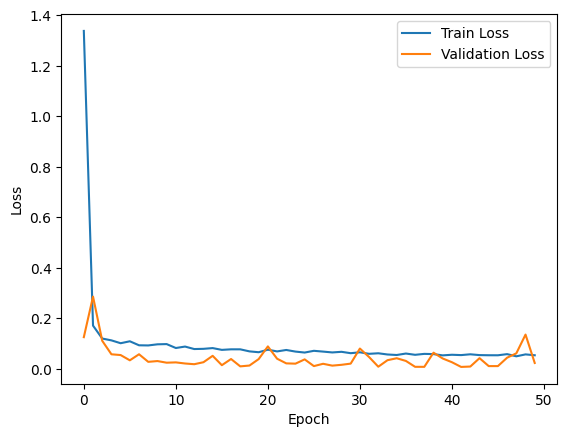

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Add Early Stopping and Regularization

Training set shape: (1214, 30, 23), (1214, 1)
Testing set shape: (304, 30, 23), (304, 1)
Epoch 1/50
38/38 [==============================] - 6s 58ms/step - loss: 1.3123 - val_loss: 0.9945
Epoch 2/50
38/38 [==============================] - 1s 24ms/step - loss: 0.7879 - val_loss: 0.6094
Epoch 3/50
38/38 [==============================] - 1s 26ms/step - loss: 0.4787 - val_loss: 0.3704
Epoch 4/50
38/38 [==============================] - 1s 22ms/step - loss: 0.3006 - val_loss: 0.2401
Epoch 5/50
38/38 [==============================] - 1s 22ms/step - loss: 0.1956 - val_loss: 0.1584
Epoch 6/50
38/38 [==============================] - 1s 22ms/step - loss: 0.1319 - val_loss: 0.1078
Epoch 7/50
38/38 [==============================] - 1s 21ms/step - loss: 0.0910 - val_loss: 0.0800
Epoch 8/50
38/38 [==============================] - 1s 21ms/step - loss: 0.0649 - val_loss: 0.0584
Epoch 9/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0473 - val_loss: 0.0388
Epoch 10/50
38/38 [=

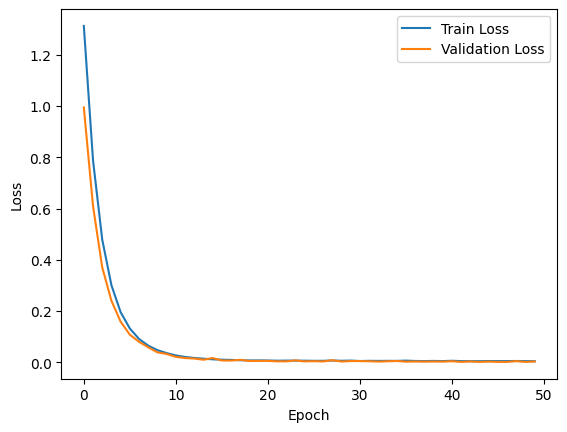

10/10 [==============================] - 0s 7ms/step


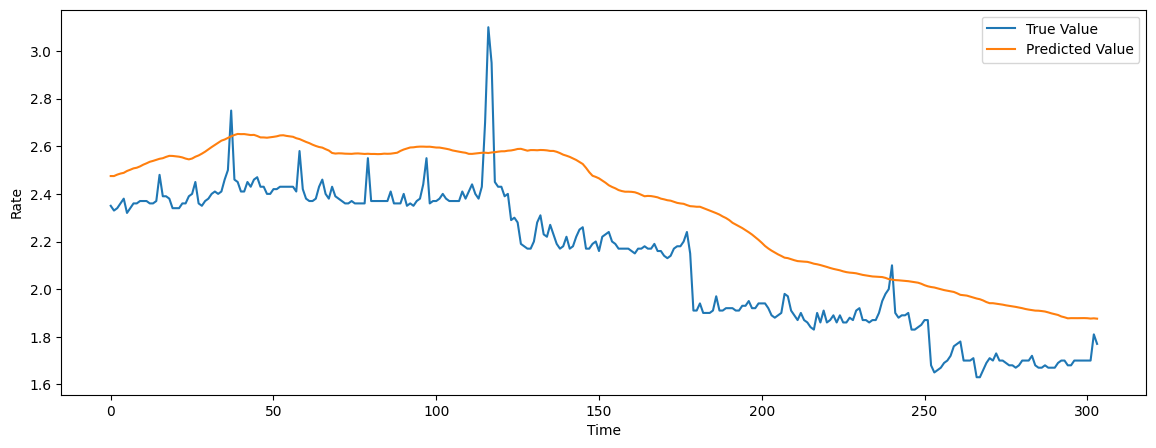

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


# Define features and target
features = df_final.drop(columns=['Rate (%)'])  # Drop target column
target = df_final['Rate (%)']

# Drop rows with NaN values in the original features dataframe
features.dropna(inplace=True)
target = target[features.index]  # Ensure the target aligns with the dropped features

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Normalize the target variable
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 30

# Create sequences
X, y = create_sequences(features_scaled, target_scaled, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

# Build the LSTM model with regularization
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(25, kernel_regularizer=l2(0.01)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert scaling for predictions
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# Invert scaling for the true values as well
y_train_true = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs true values
plt.figure(figsize=(14,5))
plt.plot(y_test_true, label='True Value')
plt.plot(y_test_pred, label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()


# High-Level Observations:
Plot 1: Training and Validation Loss
*   **Convergence** - both the training loss and validation loss decrease smoothly and converge to low values.This indicates that the model is learning well and the training process is stable.
*   **Overfitting** -the training and validation loss curves are very close to each other, suggesting minimal overfitting.

Plot 2: True Value vs. Predicted Value
*   **Overall Trend** - The predicted values (orange line) capture the overall downward trend of the true values (blue line).However, the predictions appear to be smoother and do not capture the volatility or spikes in the true values.
*   **Lag in Prediction** - there is a noticeable lag in the predicted values compared to the true values. This is common in time series prediction using LSTM models, where the model tends to smooth out the predictions.